In [1]:
# Jupyer Notebook Theme: jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
# Check python version
import sys
cdPyVer = 0x600
cdSysVer = sys.version[:5]
print("%s%s" %("My python version is: ", cdSysVer)) # strangely it works only on 3.7.4 and not 3.7.6

# Import libraries
import pandas as pd 
import numpy as np
import warnings

# Progress Bar
from tqdm.auto import tqdm

# Visualisation Libraries
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
plt.style.use('seaborn-dark') # use this theme as you are using dark theme in the notebook
import seaborn as sns
import folium
from folium.plugins import HeatMap, FastMarkerCluster

# Utility Modules
sys.path.append('/Users/Shandeep/data_science/delivery_hero')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
              
warnings.filterwarnings('ignore')

My python version is: 3.9.7


In [13]:
cd bolt

/Users/shandeep/data_science/other_projects/datasets/bolt


In [14]:
## Import datasets

demand = pd.read_csv('../bolt/demand.csv')
supply = pd.read_csv('../bolt/supply.csv')

### Demand data cleaning

In [15]:
demand[['date', 'hour']] = demand['Date'].str.split(' ', expand=True)
demand['hour'] = demand['hour'].astype('int')


# Changing data type to date time
demand['date'] = pd.to_datetime(demand['date']).dt.date

# Extract date components

# Month and Year
demand['date_year'] = demand['date'].apply(lambda x: x.year)
demand['date_month'] = demand['date'].apply(lambda x: x.month)
demand['date_month_name'] = demand['date'].apply(lambda x: x.strftime('%b'))
demand['date_year_month'] = demand['date'].apply(lambda x: x.strftime('%Y%m'))

# Week
demand['date_dayofweek_name'] = demand['date'].apply(lambda x: x.strftime('%a'))

# Time of Day
hours_bins = [- 0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
demand['date_time_day'] = pd.cut(demand['hour'], hours_bins, labels=hours_labels)

## Make columns small
demand.columns = demand.columns.str.replace(' ','_')
demand.columns = [x.lower() for x in demand.columns]

# Drop first column 'date'
demand = demand.iloc[: , 1:]

In [16]:
demand.head()

,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(%),date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day
0,9,32,78,2016-12-18,23,2016,12,Dec,201612,Sun,Night
1,29,64,69,2016-12-18,22,2016,12,Dec,201612,Sun,Night
2,5,39,89,2016-12-18,21,2016,12,Dec,201612,Sun,Night
3,13,48,79,2016-12-18,20,2016,12,Dec,201612,Sun,Night
4,12,77,87,2016-12-18,19,2016,12,Dec,201612,Sun,Night


### Suply Data Cleaning

In [17]:
supply[['date', 'hour']] = supply['Date'].str.split(' ', expand=True)
supply['hour'] = supply['hour'].astype('int')


# Changing data type to date time
supply['date'] = pd.to_datetime(supply['date']).dt.date

# Extract date components

# Month and Year
supply['date_year'] = supply['date'].apply(lambda x: x.year)
supply['date_month'] = supply['date'].apply(lambda x: x.month)
supply['date_month_name'] = supply['date'].apply(lambda x: x.strftime('%b'))
supply['date_year_month'] = supply['date'].apply(lambda x: x.strftime('%Y%m'))

# Week
supply['date_dayofweek_name'] = supply['date'].apply(lambda x: x.strftime('%a'))

# Time of Day
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
supply['date_time_day'] = pd.cut(supply['hour'], hours_bins, labels=hours_labels)

## Make columns small
supply.columns = supply.columns.str.replace(' ','_')
supply.columns = [x.lower() for x in supply.columns]

# Drop first column 'date'
supply = supply.iloc[: , 1:]

In [18]:
supply.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day
0,52,18,6,11,0.3,0.67,12.0,2016-12-18,23,2016,12,Dec,201612,Sun,Night
1,59,20,11,9,0.3,1.40,28.0,2016-12-18,22,2016,12,Dec,201612,Sun,Night
2,72,25,7,18,0.3,0.64,16.0,2016-12-18,21,2016,12,Dec,201612,Sun,Night
3,86,29,7,23,0.3,0.52,15.0,2016-12-18,20,2016,12,Dec,201612,Sun,Night
4,82,31,14,17,0.4,1.16,36.0,2016-12-18,19,2016,12,Dec,201612,Sun,Night


In [19]:
print(demand.shape)
print(supply.shape)
# Combine data frames
df = pd.merge(demand, supply,  how='outer', left_on=['date','hour'], right_on = ['date','hour'], suffixes=('', '_supply'))
# Discard the columns that acquired a suffix
df = df[[c for c in df.columns if not c.endswith('_supply')]]

(839, 11)
(840, 15)


In [20]:
df.head()

,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(%),date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),hours_per_active_driver,rides_per_online_hour,finished_rides
0,9.0,32.0,78.0,2016-12-18,23,2016.0,12.0,Dec,201612,Sun,Night,52,18,6,11,0.3,0.67,12.0
1,29.0,64.0,69.0,2016-12-18,22,2016.0,12.0,Dec,201612,Sun,Night,59,20,11,9,0.3,1.40,28.0
2,5.0,39.0,89.0,2016-12-18,21,2016.0,12.0,Dec,201612,Sun,Night,72,25,7,18,0.3,0.64,16.0
3,13.0,48.0,79.0,2016-12-18,20,2016.0,12.0,Dec,201612,Sun,Night,86,29,7,23,0.3,0.52,15.0
4,12.0,77.0,87.0,2016-12-18,19,2016.0,12.0,Dec,201612,Sun,Night,82,31,14,17,0.4,1.16,36.0


In [21]:
# Looking for null values
df.isnull().sum()

display(df[df['coverage_ratio_(%)'].isna()])

,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(%),date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),hours_per_active_driver,rides_per_online_hour,finished_rides
839,NaN,NaN,NaN,2016-12-07,5,NaN,NaN,NaN,NaN,NaN,NaN,24,8,0,8,0.3,0.0,NaN


In [22]:
df.columns

Index(['people_saw_0_cars_(unique)', 'people_saw_+1_cars_(unique)',
       'coverage_ratio_(%)', 'date', 'hour', 'date_year', 'date_month',
       'date_month_name', 'date_year_month', 'date_dayofweek_name',
       'date_time_day', 'active_drivers', 'online_(h)', 'has_booking_(h)',
       'waiting_for_booking_(h)', 'hours_per_active_driver',
       'rides_per_online_hour', 'finished_rides'],
      dtype='object')

### Understanding Demand Data

In [23]:
"""
For example, at a certain time period, there are multiple users on the app checking whether or not there is a transport available. Say, for example, within 6pm to 7pm, I log on to the app twice and I see the car only once, I will be counted in both
columns. Following which, it then means, I can derive number of users on the app during that time period using the coverage ratio.

Number of People who saw the car at least once / Number of users = Coverage Ratio
Number of users =  Number of people who saw the car at least once / Coverage Ratio
"""
df['people_on_the_app'] = df['people_saw_+1_cars_(unique)'] / df['coverage_ratio_(%)'] * 100
df['people_on_the_app'] = df['people_on_the_app'].apply(np.ceil)

In [25]:
df = df[['people_saw_0_cars_(unique)', 'people_saw_+1_cars_(unique)', 'people_on_the_app',
       'coverage_ratio_(%)', 'date', 'hour', 'date_year', 'date_month',
       'date_month_name', 'date_year_month', 'date_dayofweek_name',
       'date_time_day', 'active_drivers', 'online_(h)', 'has_booking_(h)',
       'waiting_for_booking_(h)', 'hours_per_active_driver',
       'rides_per_online_hour', 'finished_rides']]

In [26]:
df = df[['people_saw_0_cars_(unique)', 'people_saw_+1_cars_(unique)', 'people_on_the_app',
       'coverage_ratio_(%)', 'date', 'hour', 'date_year', 'date_month',
       'date_month_name', 'date_year_month', 'date_dayofweek_name',
       'date_time_day', 'active_drivers', 'online_(h)', 'has_booking_(h)',
       'waiting_for_booking_(h)', 'hours_per_active_driver',
       'rides_per_online_hour', 'finished_rides']]

df.head()

,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),people_on_the_app,coverage_ratio_(%),date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),hours_per_active_driver,rides_per_online_hour,finished_rides
0,9.0,32.0,42.0,78.0,2016-12-18,23,2016.0,12.0,Dec,201612,Sun,Night,52,18,6,11,0.3,0.67,12.0
1,29.0,64.0,93.0,69.0,2016-12-18,22,2016.0,12.0,Dec,201612,Sun,Night,59,20,11,9,0.3,1.40,28.0
2,5.0,39.0,44.0,89.0,2016-12-18,21,2016.0,12.0,Dec,201612,Sun,Night,72,25,7,18,0.3,0.64,16.0
3,13.0,48.0,61.0,79.0,2016-12-18,20,2016.0,12.0,Dec,201612,Sun,Night,86,29,7,23,0.3,0.52,15.0
4,12.0,77.0,89.0,87.0,2016-12-18,19,2016.0,12.0,Dec,201612,Sun,Night,82,31,14,17,0.4,1.16,36.0


## Demand data analysis

In [ ]:
# Lets look at coverage ratio by hour, period of day, day of the week and month?
'''
Because of the formula, there is 2 ways we can see coverage ratio being affected. (i) not enough cars on the road (ii) many users at a given time period -- undersupply or overdemand
'''

<AxesSubplot:xlabel='hour', ylabel='coverage_ratio_(%)'>

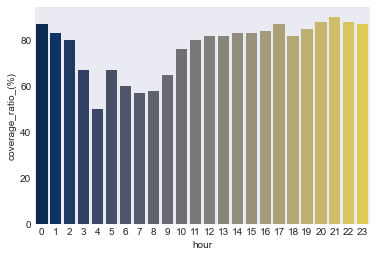

In [55]:
'''
In general, we see that coverage ratio tends to be relatively low from 4 to 9 and tends to be relatively high from 8 to 12. 
'''

demand_by_hour = df.groupby(by=['hour'], as_index=False).agg({'coverage_ratio_(%)': 'median'})
# display(demand_by_hour.sort_values(by = 'coverage_ratio_(%)', ascending = False).style.format({"coverage_ratio_(%)": "{0:.0f}"}))
sns.barplot(y = 'coverage_ratio_(%)', x = 'hour', data = demand_by_hour, palette = 'cividis')

<AxesSubplot:xlabel='date_time_day', ylabel='coverage_ratio_(%)'>

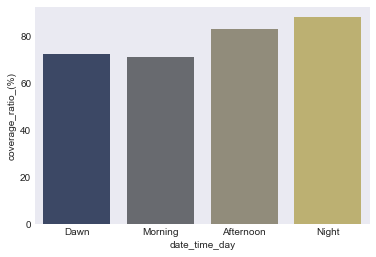

In [57]:
demand_by_date_time_day = df.groupby(by=['date_time_day'], as_index=False).agg({'coverage_ratio_(%)': 'median'})
# display(demand_by_hour.sort_values(by = 'coverage_ratio_(%)', ascending = False).style.format({"coverage_ratio_(%)": "{0:.0f}"}))
sns.barplot(y = 'coverage_ratio_(%)', x = 'date_time_day', data = demand_by_date_time_day, palette = 'cividis')

<AxesSubplot:xlabel='date_dayofweek_name', ylabel='coverage_ratio_(%)'>

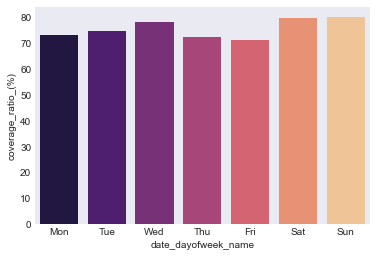

In [109]:
'''
In terms of day of week, coverage seems fairly consistent in general with slight increase on Wednesdays and over the weekend. Undersupply typically on Fridays.
'''

demand_by_date_dayofweek_name = df.groupby(by=['date_dayofweek_name'], as_index=False).agg({'coverage_ratio_(%)': 'mean'})
# display(demand_by_hour.sort_values(by = 'coverage_ratio_(%)', ascending = False).style.format({"coverage_ratio_(%)": "{0:.0f}"}))
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"]
sns.barplot(y = 'coverage_ratio_(%)', x = 'date_dayofweek_name', data = demand_by_date_dayofweek_name, palette = 'magma', order = order)

### Supply data analysis

In [70]:
df.head()

,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),people_on_the_app,coverage_ratio_(%),date,hour,date_year,date_month,date_month_name,date_year_month,date_dayofweek_name,date_time_day,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),hours_per_active_driver,rides_per_online_hour,finished_rides
0,9.0,32.0,42.0,78.0,2016-12-18,23,2016.0,12.0,Dec,201612,Sun,Night,52,18,6,11,0.3,0.67,12.0
1,29.0,64.0,93.0,69.0,2016-12-18,22,2016.0,12.0,Dec,201612,Sun,Night,59,20,11,9,0.3,1.40,28.0
2,5.0,39.0,44.0,89.0,2016-12-18,21,2016.0,12.0,Dec,201612,Sun,Night,72,25,7,18,0.3,0.64,16.0
3,13.0,48.0,61.0,79.0,2016-12-18,20,2016.0,12.0,Dec,201612,Sun,Night,86,29,7,23,0.3,0.52,15.0
4,12.0,77.0,89.0,87.0,2016-12-18,19,2016.0,12.0,Dec,201612,Sun,Night,82,31,14,17,0.4,1.16,36.0


In [115]:
df['driver_supply'] = df['has_booking_(h)']/df['online_(h)']

In [91]:
supply_demand = df.groupby(by=['hour'], as_index=False).agg({'active_drivers': 'mean','people_on_the_app':'mean'})

supply_demand

,hour,active_drivers,people_on_the_app
0,0,61.171429,54.485714
1,1,51.514286,38.200000
2,2,39.714286,30.657143
3,3,31.942857,31.000000
4,4,27.371429,26.617647
5,5,26.657143,12.060606
6,6,28.342857,10.428571
7,7,36.714286,28.600000
8,8,47.285714,57.828571
9,9,57.114286,72.028571


<AxesSubplot:xlabel='hour'>

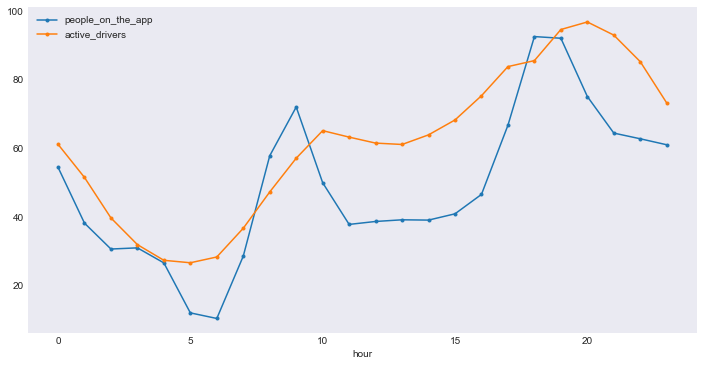

In [93]:
"""
In general we see that we have more supply than demand except for certain times such as 8 to 10 in the morning and 6pm in the evening. This could help explain why for our coverage ratio shown above there was a slight dip from 5pm before gradually going
back up again ater 6pm.
"""
supply_demand.plot(x="hour", y=["people_on_the_app", "active_drivers"], figsize=(12, 6), style='.-')

<AxesSubplot:xlabel='driver_utilisation', ylabel='date_dayofweek_name'>

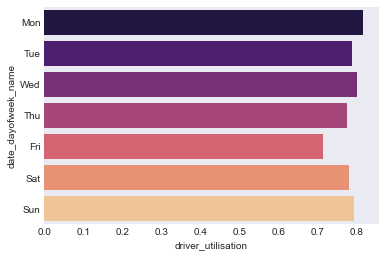

In [116]:
"""
Generally speaking, we can see that Mondays and Wednesdays have low driver utilisation hours
"""

driver_supply = df.groupby(by=['date_dayofweek_name'], as_index=False).agg({'driver_utilisation': 'median'})
# display(demand_by_hour.sort_values(by = 'coverage_ratio_(%)', ascending = False).style.format({"coverage_ratio_(%)": "{0:.0f}"}))
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"]
sns.barplot(y = 'date_dayofweek_name', x = 'driver_utilisation', data = driver_supply, palette = 'magma', order = order)